Scipy:

We have the min and max temperatures in a city In India for each months of the year.

We would like to find a function to describe this and show it graphically, the dataset
given below.

Task:

1.fitting it to the periodic function

2.plot the fit

Data

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18


In [38]:
max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

In [39]:
import pandas as pd
import numpy as np
import seaborn as snp
import matplotlib.pyplot as plt
from scipy import optimize

In [40]:
data = pd.DataFrame({"max_temp":max_temp, "min_temp":min_temp, "month":np.arange(12)})

In [41]:
data.head()

,max_temp,min_temp,month
0,39,21,0
1,41,23,1
2,43,27,2
3,47,28,3
4,49,32,4


In [29]:
def yearly_temps(times, avg, ampl, timeoffset):
    return (avg + ampl * np.cos((times + timeoffset) * 2 * np.pi / times.max()))

In [44]:
res_max, cov_max = optimize.curve_fit(yearly_temps, data['month'], data['max_temp'], [20,10,0])

In [45]:
res_min, cov_min = optimize.curve_fit(yearly_temps, data['month'], data['min_temp'], [-40, 20, 0])

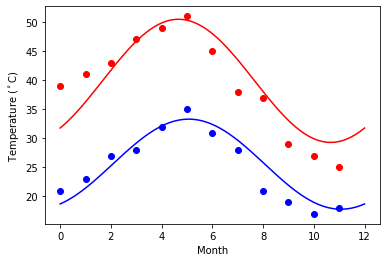

In [46]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, max_temp, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, min_temp, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

Q.2 This assignment is for visualization using matplotlib:
    
data to use:
    
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
    
titanic = pd.read_csv(url)

Charts to plot:
    
1. Create a pie chart presenting the male/female proportion

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [53]:
import matplotlib.pyplot as plt

In [51]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'

In [52]:
titanic = pd.read_csv(url)

In [55]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [66]:
ct = titanic['sex'].value_counts()

In [70]:
# prop_Male = ct.male/(ct.male+ct.female)*100
# prop_Female = 100 - prop_Male
# prop = [prop_Male, prop_Female]

([<matplotlib.patches.Wedge at 0x195d2e0a608>,
 [Text(-0.48083677220945115, 0.9893411941747885, 'Male'),
  Text(0.5245491049970633, -1.0792813518479694, 'Female')],
 [Text(-0.262274603023337, 0.5396406513680664, '64.4%'),
  Text(0.3059869779149536, -0.629580788577982, '35.6%')])

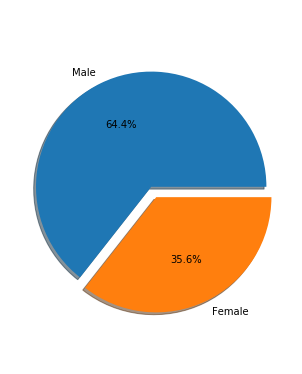

In [94]:
fig = plt.figure(figsize=(4,5))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(ct, labels=['Male', 'Female'], autopct='%1.1f%%', shadow=True, explode = [0,0.1])

In [106]:
# Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

<Figure size 432x288 with 0 Axes>

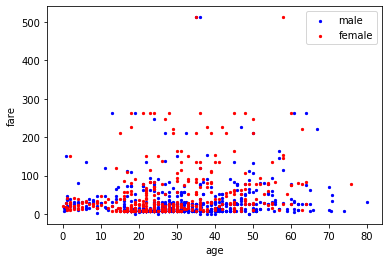

In [105]:
plt.figure()
c1 = titanic[titanic['sex']=='male'].plot.scatter('age', 'fare', color='blue', label='male', marker='.')
titanic[titanic['sex']=='female'].plot.scatter('age', 'fare', color='red', label='female', ax=c1, marker='.')